In [188]:
#Загрузка и предобработка данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from IPython.display import Image

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,12)

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [189]:
df = pd.read_csv('csv_dir/dataset_Facebook.csv', sep = ';')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4.0,3,0.0,2752.0,5091.0,178.0,109.0,159.0,3078.0,1640.0,119.0,4.0,79.0,17.0,100
1,139441,Status,2,12,3.0,10,0.0,10460.0,19057.0,1457.0,1361.0,1674.0,11710.0,6112.0,1108.0,5.0,130.0,29.0,164
2,139441,Photo,3,12,3.0,3,0.0,2413.0,4373.0,177.0,113.0,154.0,2812.0,1503.0,132.0,0.0,66.0,14.0,80
3,139441,Photo,2,12,2.0,10,1.0,50128.0,87991.0,2211.0,790.0,1119.0,61027.0,32048.0,1386.0,58.0,1572.0,147.0,1777
4,139441,Photo,2,12,2.0,3,0.0,7244.0,13594.0,671.0,410.0,580.0,6228.0,3200.0,396.0,19.0,325.0,49.0,393


In [190]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4.0,3,0.0,2752.0,5091.0,178.0,109.0,159.0,3078.0,1640.0,119.0,4.0,79.0,17.0,100
1,139441,Status,2,12,3.0,10,0.0,10460.0,19057.0,1457.0,1361.0,1674.0,11710.0,6112.0,1108.0,5.0,130.0,29.0,164
2,139441,Photo,3,12,3.0,3,0.0,2413.0,4373.0,177.0,113.0,154.0,2812.0,1503.0,132.0,0.0,66.0,14.0,80
3,139441,Photo,2,12,2.0,10,1.0,50128.0,87991.0,2211.0,790.0,1119.0,61027.0,32048.0,1386.0,58.0,1572.0,147.0,1777
4,139441,Photo,2,12,2.0,3,0.0,7244.0,13594.0,671.0,410.0,580.0,6228.0,3200.0,396.0,19.0,325.0,49.0,393


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 496 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         496 non-null    float64
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 497 non-null    float64
 7   Lifetime

In [192]:
df = df.dropna()
#Удаляем пропуски и кодируем категориальный признак Type с помощью LabelEncoder
df = df.dropna()
from sklearn.preprocessing import LabelEncoder
df[["Type"]] = df[["Type"]].apply(LabelEncoder().fit_transform)

In [193]:
y = df['Paid']
X = df.drop(['Paid'], axis = 1)

In [194]:
# Кросс валидация
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold

In [195]:
model = DecisionTreeClassifier(random_state=666)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=666)

train_scores, valid_scores = validation_curve(
    model,
    X,
    y,
    param_name="max_depth",
    param_range=range(1,15),
    scoring = "neg_log_loss",
    cv=cv
)

Text(0, 0.5, 'neg_log_loss')

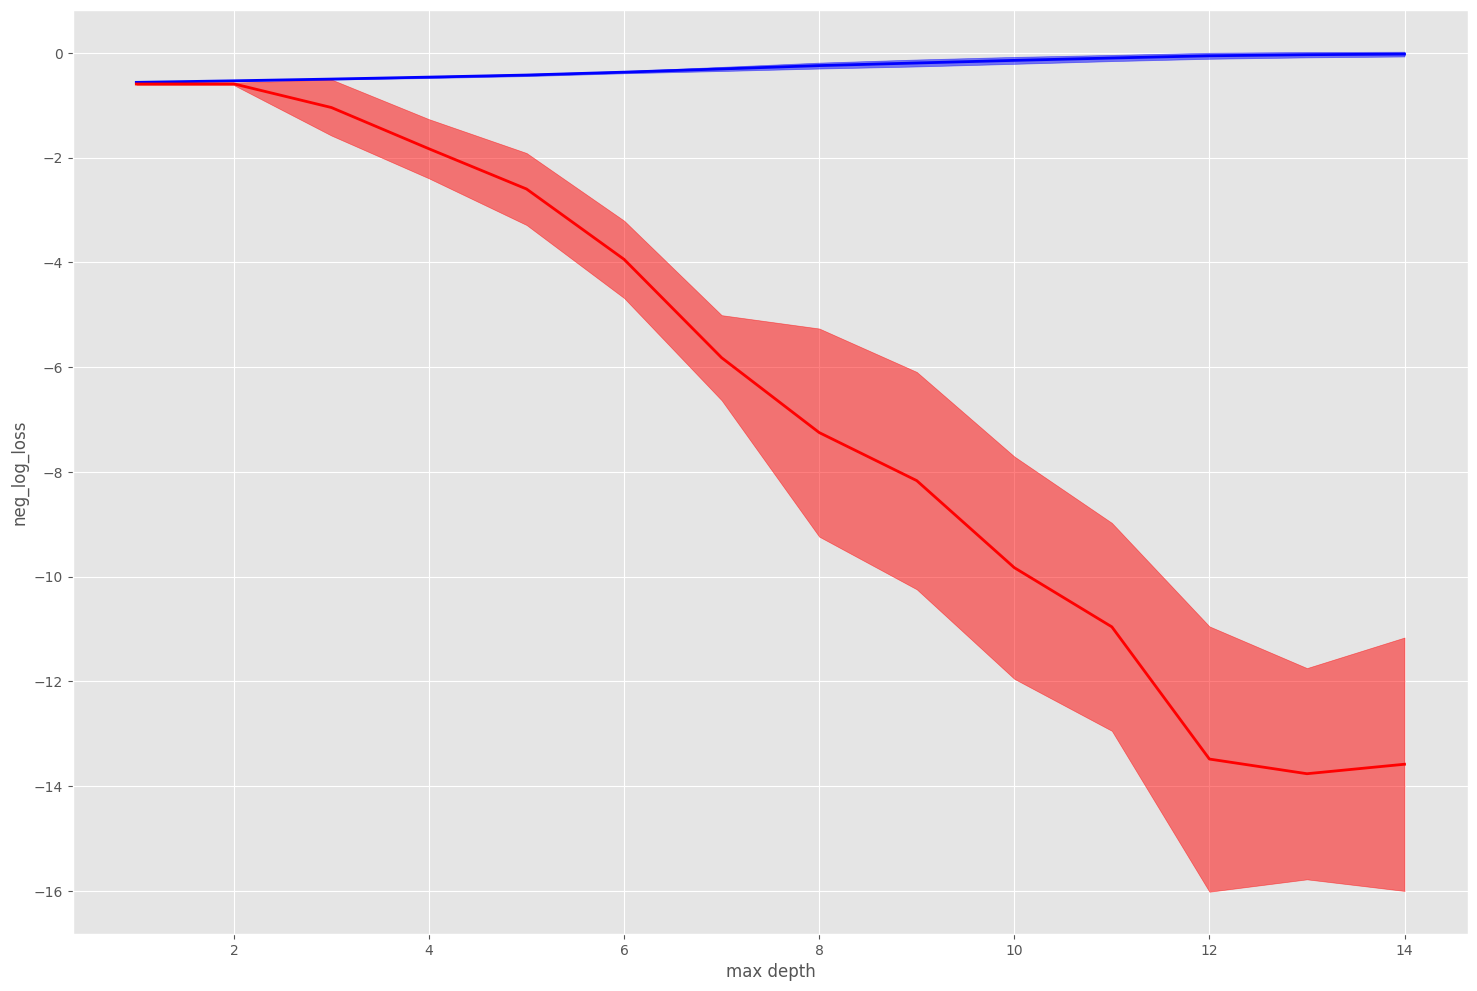

In [196]:
# Построение графика
train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

plt.fill_between(
    range(1,15),
    train_score_mean-train_score_std,
    train_score_mean+train_score_std,
    color='b',
    interpolate=True,
    alpha=0.5
)

plt.fill_between(
    range(1,15),
    valid_scores_mean-valid_scores_std,
    valid_scores_mean+valid_scores_std,
    color='r',
    interpolate=True,
    alpha=0.5
)

plt.plot(range(1,15), train_score_mean, c='b', lw=2)
plt.plot(range(1,15), valid_scores_mean, c='r', lw=2)

plt.xlabel('max depth')
plt.ylabel('neg_log_loss')

In [197]:
# Подбор гиперпараметров методом случайного перебора
from sklearn.model_selection import RandomizedSearchCV

In [198]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 15),
    'min_samples_leaf': range(1, 15),
    'class_weight': [None, 'balanced']
}

cv = StratifiedKFold(n_splits=5, random_state=132, shuffle=True)

model = DecisionTreeClassifier(random_state=132)
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=100,
    n_jobs=-1,
    cv=cv,
    scoring='neg_log_loss',
    random_state=132
)

random_search.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=132, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=132),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 15),
                                        'min_samples_leaf': range(1, 15)},
                   random_state=132, scoring='neg_log_loss')

In [199]:
# Вывод наилучших гиперпараметров модели
random_search.best_params_

{'min_samples_leaf': 4,
 'max_depth': 2,
 'criterion': 'gini',
 'class_weight': None}

In [200]:
random_search.best_score_ #лучшее значение метрики

-0.5681806373802422

In [201]:
best_model = random_search.best_estimator_
best_model

DecisionTreeClassifier(max_depth=2, min_samples_leaf=4, random_state=132)

In [202]:
# Важность признаков модели
model = random_search.best_estimator_
imp = model.feature_importances_
pd.Series(index=df.columns[:-1], data = imp).sort_values()

Lifetime Post Total Impressions                                        0.000000
comment                                                                0.000000
Lifetime People who have liked your Page and engaged with your post    0.000000
Lifetime Post Impressions by people who have liked your Page           0.000000
Lifetime Post Consumptions                                             0.000000
Lifetime Post Consumers                                                0.000000
Lifetime Engaged Users                                                 0.000000
like                                                                   0.000000
share                                                                  0.000000
Paid                                                                   0.000000
Post Hour                                                              0.000000
Post Weekday                                                           0.000000
Post Month                              

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=132)

In [205]:
model = DecisionTreeClassifier(
    max_depth=2,
    min_samples_leaf=4,
    random_state=132
)
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [206]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.73      0.98      0.84       106
         1.0       0.33      0.03      0.05        40

    accuracy                           0.72       146
   macro avg       0.53      0.50      0.44       146
weighted avg       0.62      0.72      0.62       146

